In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python


## Загрузка изображения

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg")


('image.jpg', <http.client.HTTPMessage at 0x7f6d2b5ce1d0>)

In [ ]:
import cv2

In [ ]:
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)
img = img[:,:,::-1]

# Задание 1 Изменение размера изображения

In [ ]:
#Ваш код здесь
def resize_nn(img, size_factor):
  len_x = round(img.shape[0] * size_factor)
  len_y = round(img.shape[1] * size_factor)
  new_img = np.zeros((len_x, len_y, 3), dtype='uint8')
  for i in range(len_x):
    for j in range(len_y):
      i_near = round(i/size_factor)
      if i_near >= img.shape[0]:
        i_near = img.shape[0] - 1
      j_near = round(j/size_factor)
      if j_near >= img.shape[1]:
        j_near = img.shape[1] - 1
      new_img[i][j]=img[i_near][j_near]
  return new_img

In [ ]:
def resize_bilinear(img, size_factor):
  len_x = round(img.shape[0] * size_factor)
  len_y = round(img.shape[1] * size_factor)
  new_img = np.zeros((len_x, len_y, 3), dtype='uint8')
  for i in range(len_x):
    for j in range(len_y):
      i_start = int(i/size_factor)
      if i_start >= img.shape[0] - 1:
        i_start = img.shape[0] - 2
      j_start = int(j/size_factor)
      if j_start >= img.shape[1] - 1:
        j_start = img.shape[1] - 2
      q1 = img[i_start][j_start] * (i_start + 1 - i/size_factor) + img[i_start + 1][j_start] * (i/size_factor - i_start)
      q2 = img[i_start][j_start + 1] * (i_start + 1 - i/size_factor) + img[i_start + 1][j_start + 1] * (i/size_factor - i_start)
      new_img[i][j] = q1 * (j_start + 1 - j/size_factor) + q2 * (j/size_factor - j_start)
  return new_img

In [ ]:
print(img.shape)
nn_img = resize_nn(img, 2)
print(nn_img.shape)
bilinear_img = resize_bilinear(img, 2)
print(bilinear_img.shape)

(512, 512, 3)
(1024, 1024, 3)
(1024, 1024, 3)


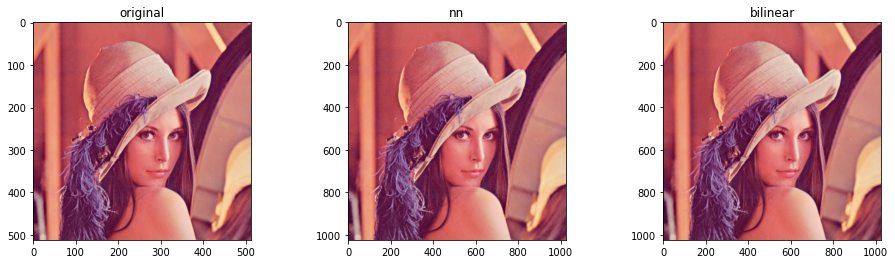

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].imshow(img)
axs[0].set_title("original");

axs[1].imshow(nn_img)
axs[1].set_title("nn");

axs[2].imshow(bilinear_img)
axs[2].set_title("bilinear");

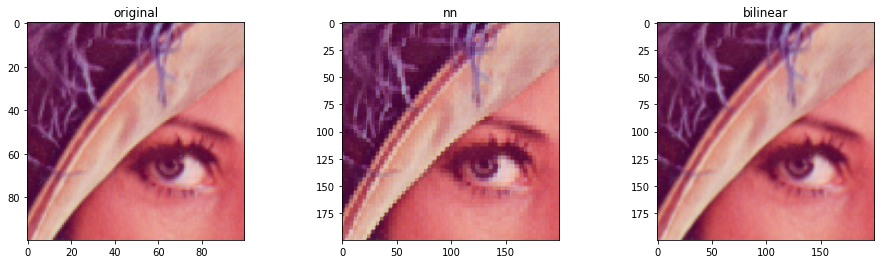

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].imshow(img[200:300, 200:300])
axs[0].set_title("original");

axs[1].imshow(nn_img[400:600, 400:600])
axs[1].set_title("nn");

axs[2].imshow(bilinear_img[400:600, 400:600])
axs[2].set_title("bilinear");

# Задание 2 Сжатие изображения



In [ ]:
#Ваш код здесь
def downsample_1(img, size_factor):
  len_x = round(img.shape[0] / size_factor)
  len_y = round(img.shape[1] / size_factor)
  new_img = np.zeros((len_x, len_y, 3), dtype='uint8')
  for i in range(len_x):
    for j in range(len_y):
      i_near = round(i*size_factor)
      if i_near >= img.shape[0]:
        i_near = img.shape[0] - 1
      j_near = round(j*size_factor)
      if j_near >= img.shape[1]:
        j_near = img.shape[1] - 1
      new_img[i][j]=img[i_near][j_near]
  return new_img

In [ ]:
def downsample_2(img, size_factor):
  len_x = round(img.shape[0] / size_factor)
  len_y = round(img.shape[1] / size_factor)
  new_img = np.zeros((len_x, len_y, 3), dtype='uint8')
  for i in range(len_x):
    for j in range(len_y):
      i_start = int(i*size_factor)
      j_start = int(j*size_factor)
      s = np.array([0,0,0], dtype='int')
      for k in range(i_start, i_start + size_factor):
        for l in range(j_start, j_start + size_factor):
          s += img[k][l]
      s = s/size_factor**2
      new_img[i][j] = s.astype('uint8')
  return new_img
      

In [ ]:
dw1_img = downsample_1(img, 2)
print(dw1_img.shape)
dw2_img = downsample_2(img, 2)
print(dw2_img.shape)

(256, 256, 3)
(256, 256, 3)


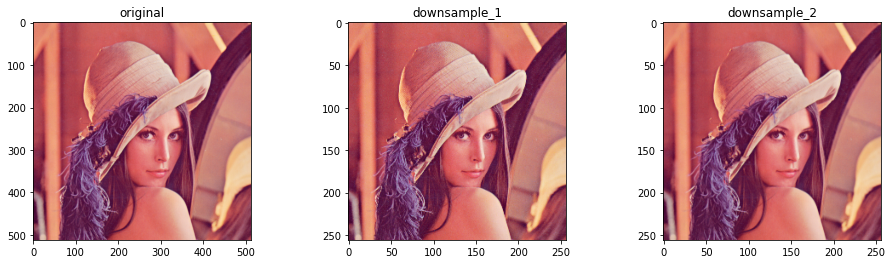

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].imshow(img)
axs[0].set_title("original");

axs[1].imshow(dw1_img)
axs[1].set_title("downsample_1");

axs[2].imshow(dw2_img)
axs[2].set_title("downsample_2");

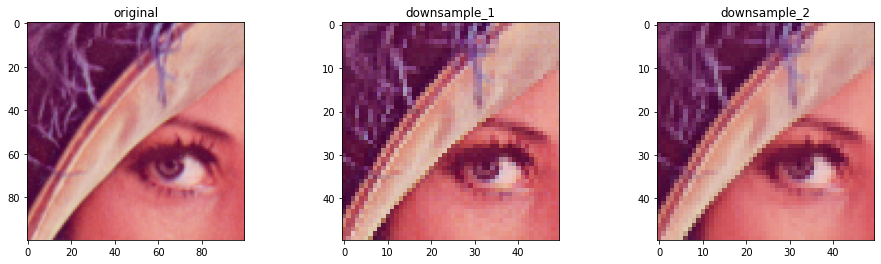

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].imshow(img[200:300, 200:300])
axs[0].set_title("original");

axs[1].imshow(dw1_img[100:150, 100:150])
axs[1].set_title("downsample_1");

axs[2].imshow(dw2_img[100:150, 100:150])
axs[2].set_title("downsample_2");

# Задание 3 Изменение яркости

In [ ]:
#Ваш код здесь
def linear_hist_transform(img, percent=0.05):
  sorted_vals = np.sort(img.ravel())
  bound = int(percent * len(sorted_vals))
  bounded_vals = sorted_vals[bound:len(sorted_vals) - bound]
  min_val = bounded_vals[0]
  max_val = bounded_vals[-1]
  new_img = np.apply_along_axis(lambda x: ((x.astype(float) - min_val) / (max_val - min_val) * 255).astype(int), 0, img)
  return new_img

original: 25 245
transform: -32 320


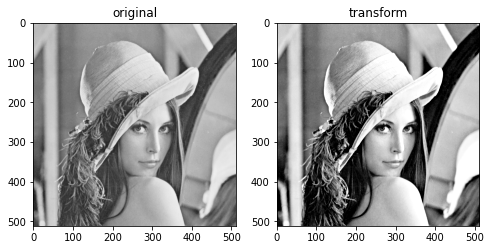

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

_, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(gray_img, cmap="Greys_r", vmin=0, vmax=255)
axs[0].set_title("original");

norm_gray_img = linear_hist_transform(gray_img)
axs[1].imshow(norm_gray_img, cmap="Greys_r", vmin=0, vmax=255)
axs[1].set_title("transform");

print("original:", np.min(gray_img), np.max(gray_img))
print("transform:", np.min(norm_gray_img), np.max(norm_gray_img))

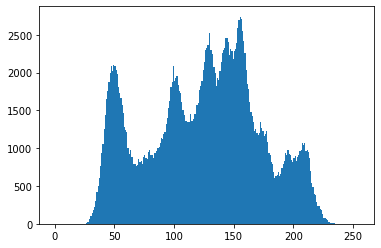

In [ ]:
plt.hist(gray_img.ravel(), bins=255, range=[0, 255])
plt.show()

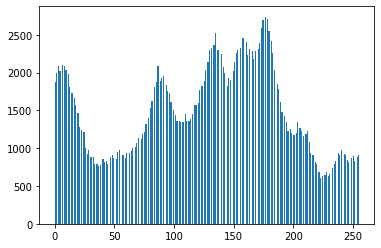

In [ ]:
plt.hist(norm_gray_img.ravel(), bins=255, range=[0, 255])
plt.show()

# Задание 4 Гамма коррекция

In [ ]:
#Ваш код здесь
def gamma_transform(img, gamma):
  return np.apply_along_axis(lambda x: (np.power(x / 255, gamma) * 255).astype(int), 0, img)

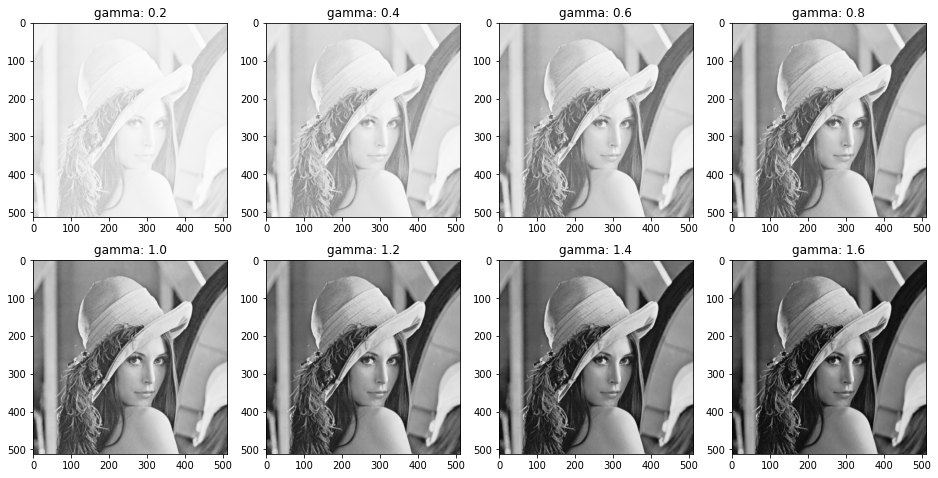

In [ ]:
_, axs = plt.subplots(2, 4, figsize=(16, 8))

for i, gamma in enumerate(np.arange(0.2, 1.7, 0.2)):
  gamma_img = gamma_transform(gray_img, gamma)
  axs[i // 4][i % 4].imshow(gamma_img, cmap="Greys_r", vmin=0, vmax=255)
  axs[i // 4][i % 4].set_title(f"gamma: {gamma:.1f}")

# Задание 5 Эквализация гистограммы

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Unequalized_Hawkes_Bay_NZ.jpg/300px-Unequalized_Hawkes_Bay_NZ.jpg"
urllib.request.urlretrieve(url, "image_heq.jpg")
#Ваш код здесь

('image_heq.jpg', <http.client.HTTPMessage at 0x7f6d109de350>)

(200, 300)


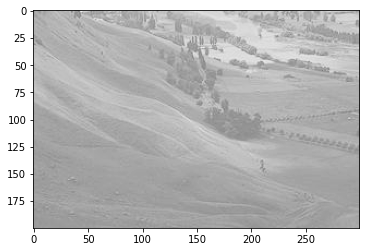

In [ ]:
img_heq = cv2.imread('image_heq.jpg', cv2.IMREAD_COLOR)
img_heq = img_heq[:,:,::-1]
img_heq = cv2.cvtColor(img_heq, cv2.COLOR_RGB2GRAY)
plt.imshow(img_heq, cmap="Greys_r", vmin=0, vmax=255)
print(img_heq.shape)

In [ ]:
p_n = np.array(list(map(lambda intence: np.sum(np.where(img_heq == intence, 1, 0)), range(256)))) / (img_heq.shape[0] * img_heq.shape[1])

In [ ]:
def hist_eq(img):
  p_n = np.array(list(map(lambda intence: np.sum(np.where(img == intence, 1, 0)), range(256)))) / (img.shape[0] * img.shape[1])
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i][j] = np.floor(255 * np.sum(p_n[:img[i][j]])).astype('uint8')
  return new_img

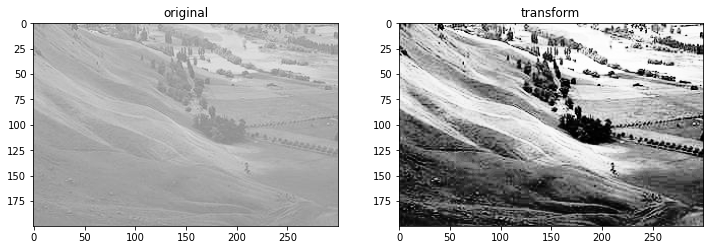

In [ ]:
_, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].imshow(img_heq, cmap="Greys_r", vmin=0, vmax=255)
axs[0].set_title("original");

eq_img_heq = hist_eq(img_heq)
axs[1].imshow(eq_img_heq, cmap="Greys_r", vmin=0, vmax=255)
axs[1].set_title("transform");

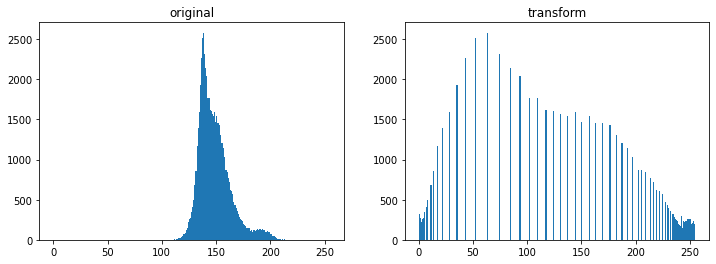

In [ ]:
_, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(img_heq.ravel(), bins=255, range=[0, 255])
axs[0].set_title("original");

eq_img_heq = hist_eq(img_heq)
axs[1].hist(eq_img_heq.ravel(), bins=255, range=[0, 255])
axs[1].set_title("transform");